<h1>A brief discussion on Fourier series</h1>


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Defining a bunch of sine waves.
time = np.arange(0, 10, 0.1)

wave1 = np.sin(time)
wave2 = np.sin(3*time)/3
wave3 = np.sin(10*time)/10

Text(0.5, 1.0, '...and their overlap!')

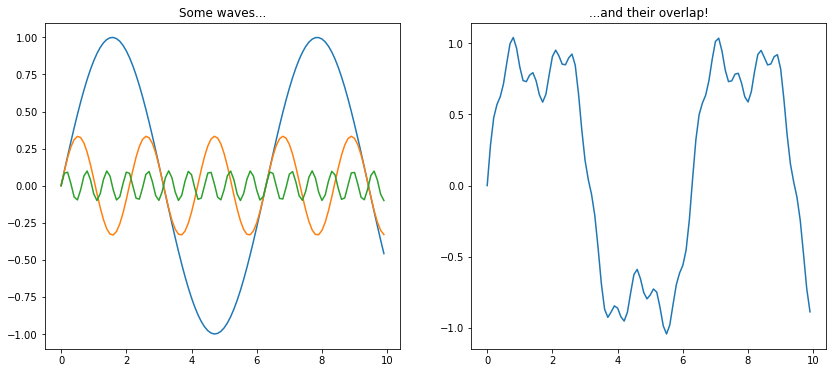

In [9]:
# Plotting those waves
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(time,wave1)
ax[0].plot(time,wave2)
ax[0].plot(time,wave3)

ax[1].plot(time,wave1+wave2+wave3)

ax[0].set_title('Some waves...')
ax[1].set_title('...and their overlap!')

Now let us reverse engineer that!

In [4]:
data = wave1+wave2+wave3
n = len(data)
fhat = np.fft.fft(data, n) # Computes the fft.

C:\Users\andre\anaconda3\envs\ecgppgbp\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Signal FFT')

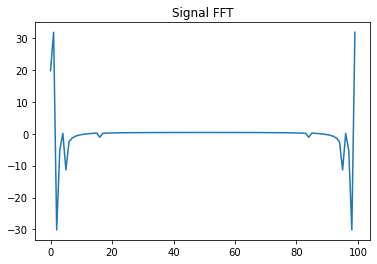

In [5]:
plt.plot(fhat)
plt.title('Signal FFT')

In [10]:
psd = fhat * np.conj(fhat)/n  # Power spectrum.

Text(0.5, 1.0, 'Power spectrum')

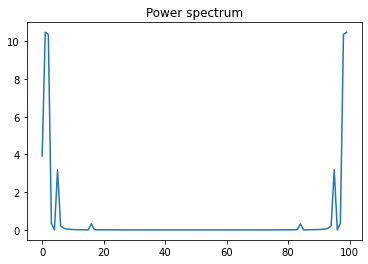

In [11]:
plt.plot(psd.real)
plt.title('Power spectrum')

In [12]:
freq = (1/(1*n)) * np.arange(n) # Frequency array.
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)

threshold = 10
## Filter out noise
psd_idxs = psd > threshold # Array of 0 and 1.
psd_clean = psd * psd_idxs # Zero out all the unnecessary powers.
fhat_clean = psd_idxs * fhat # Used to retrieve the signal.
signal_filtered = np.fft.ifft(fhat_clean) # Using the inverse transform.

Text(0.5, 1.0, '...filtered')

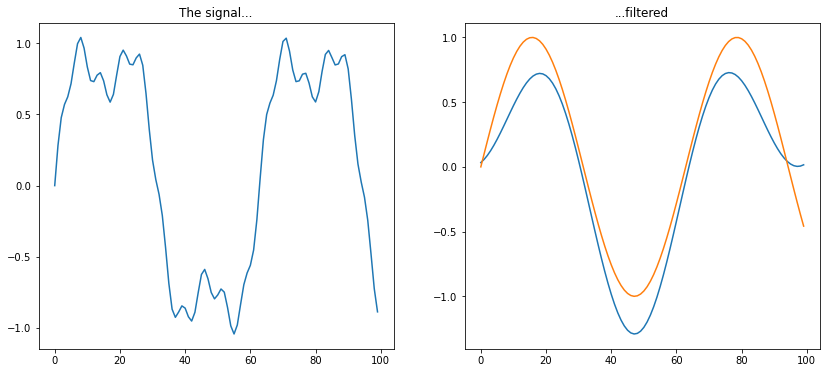

In [13]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

ax[1].plot(signal_filtered.real)
ax[1].plot(wave1)
ax[0].plot(data)

ax[0].set_title('The signal...')
ax[1].set_title('...filtered')

<h1>Some real action</h1>

In [ ]:
def sigfil(data, threshold=5000):
    '''
    This function will take the a signal as an input and filter the frequencies
    that are below the specified threshold in the Fast Fourrier Transform.
    '''
    n = len(data)
    fhat = np.fft.fft(data, n) # Computes the fft.
    psd = fhat * np.conj(fhat)/n  # Power spectrum.
    freq = (1/(1*n)) * np.arange(n) # Frequency array.
    idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)

    ## Filter out noise
    psd_idxs = psd > threshold # Array of 0 and 1.
    psd_clean = psd * psd_idxs # Zero out all the unnecessary powers.
    fhat_clean = psd_idxs * fhat # Used to retrieve the signal.

    signal_filtered = np.fft.ifft(fhat_clean) # Inverse fourier transform.
    return(signal_filtered.real)

In [14]:
# Opening one of the PPG measurements.
ppg = np.loadtxt('ppgsample.txt')

Text(0.5, 1.0, 'PPG signal - Derivative')

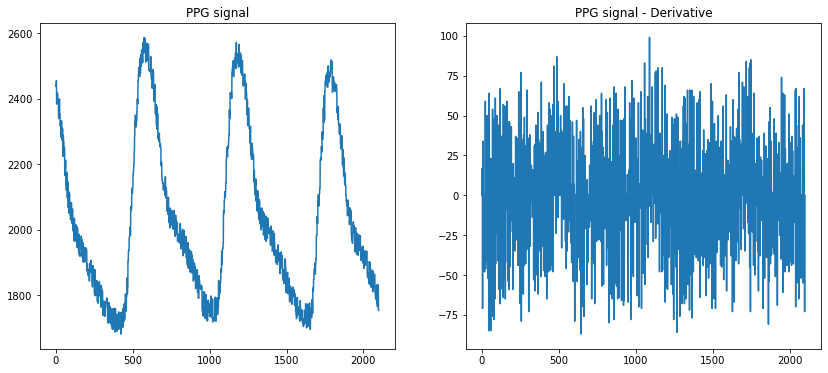

In [15]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(ppg)
ax[1].plot(np.diff(ppg))

ax[0].set_title('PPG signal')
ax[1].set_title('PPG signal - Derivative')

In [16]:
n = len(ppg)
fhat = np.fft.fft(ppg, n) # Computes the fft.
psd = fhat * np.conj(fhat)/n  # Power spectrum.
freq = (1/(1*n)) * np.arange(n) # Frequency array.
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)

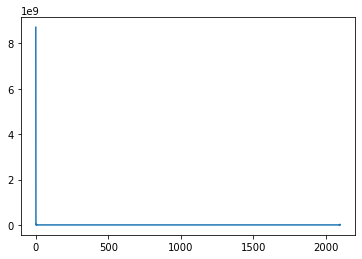

In [17]:
plt.plot(psd.real)

In [18]:
threshold = 1e6
## Filter out noise
psd_idxs = psd > threshold # Array of 0 and 1.
psd_clean = psd * psd_idxs # Zero out all the unnecessary powers.
fhat_clean = psd_idxs * fhat # Used to retrieve the signal.

signal_filtered = np.fft.ifft(fhat_clean) # Inverse fourier transform.

Text(0.5, 1.0, 'Filtered PPG signal - Derivative')

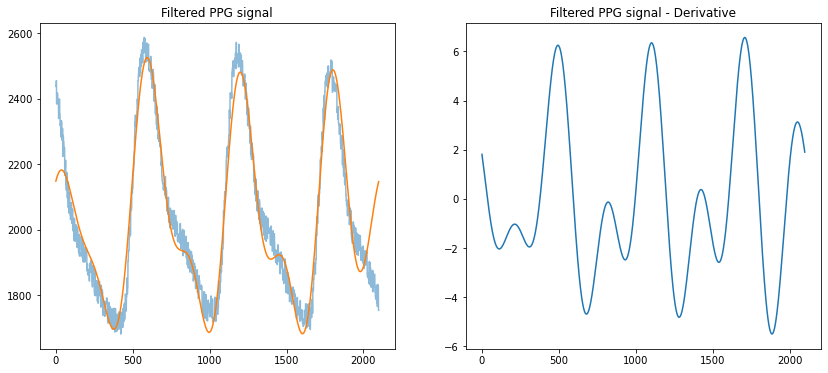

In [19]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(ppg,alpha=.5)
ax[0].plot(signal_filtered.real)
ax[1].plot(np.diff(signal_filtered.real))

ax[0].set_title('Filtered PPG signal')
ax[1].set_title('Filtered PPG signal - Derivative')

In [20]:
from scipy.io import wavfile
samplerate, wav = wavfile.read('wavsample.wav')

In [21]:
from scipy.io.wavfile import read
wav = wavfile.read('wavsample.wav')
wav = np.array(wav[1],dtype=float)

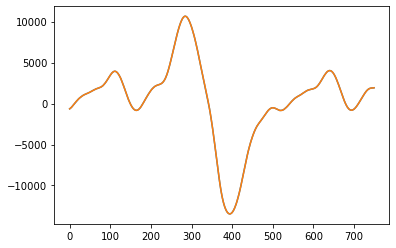

In [22]:
plt.plot(wav[0:750])

In [23]:
wav = wav[0:750]

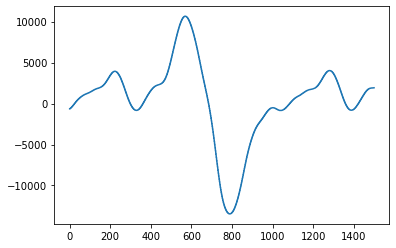

In [24]:
plt.plot(wav.ravel())

In [25]:
n = len(wav)
fhat = np.fft.fft(wav, n) # Computes the fft.
psd = fhat * np.conj(fhat)/n  # Power spectrum.
freq = (1/(1*n)) * np.arange(n) # Frequency array.
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)

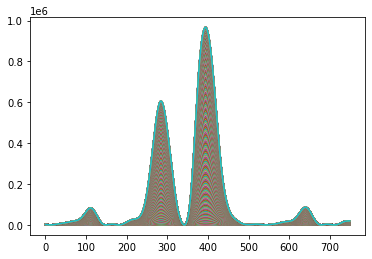

In [26]:
plt.plot(psd.real)

In [27]:
n = len(wav.ravel())
fhat = np.fft.fft(wav.ravel(), n) # Computes the fft.
psd = fhat * np.conj(fhat)/n  # Power spectrum.
freq = (1/(1*n)) * np.arange(n) # Frequency array.
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)

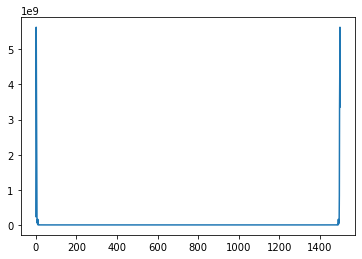

In [28]:
plt.plot(psd.real)

In [29]:
threshold = 1e9
## Filter out noise
psd_idxs = psd > threshold # Array of 0 and 1.
psd_clean = psd * psd_idxs # Zero out all the unnecessary powers.
fhat_clean = psd_idxs * fhat # Used to retrieve the signal.

signal_filtered = np.fft.ifft(fhat_clean) # Inverse fourier transform.

C:\Users\andre\anaconda3\envs\ecgppgbp\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


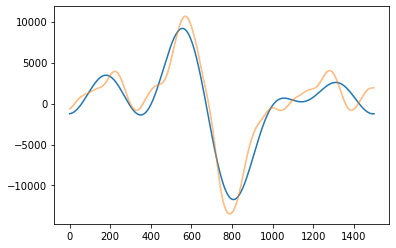

In [30]:
plt.plot(signal_filtered)
plt.plot(wav.ravel(), alpha=0.5)